In [1]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

In [2]:
model_path = "yolo8v-mgh.pt"

model = YOLO(model_path)  # load a custom model


image 1/1 c:\Users\wma22\OneDrive\Documents\GitHub\mgh-critical-edition-yolo\page_103.jpg: 640x448 2 bodys, 1 title, 101.0ms
Speed: 7.0ms preprocess, 101.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)


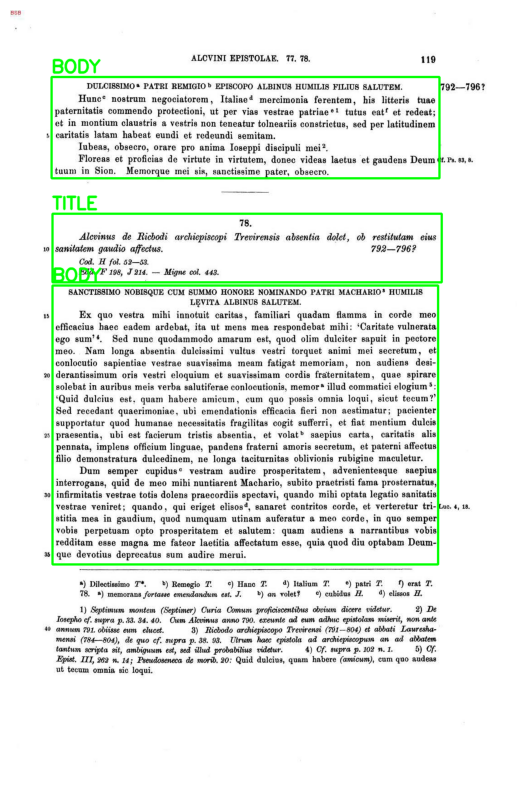

In [3]:
# Define path to the image
image_path = "page_103.jpg"

results = model(image_path)
results[0].boxes.data.tolist()

# Load the image
image = cv2.imread(image_path)
threshold = 0.5
# Draw bounding boxes on the image
for result in results[0].boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = result
    if score > threshold:
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
        cv2.putText(image, results[0].names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

# Convert BGR image to RGB for plotting
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image in the notebook
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.show()